# Projet Machine Learning - Groupe 1

Promotion 58 - 4GMM, Année universitaire 2023-2024 

Julia Manon (A), Piot Damien (B), Dumas Thomas (B), Ben Abdallah Selim (A)


Les données sont issues du site du concours KAGGLE; il s’agit du jeu de données " Global Data on Sustainable Energy" (2000-2020) disponible ici: https://www.kaggle.com/datasets/anshtanwar/global-data-on-sustainable-energy.

Le jeu de données comprend 3649 observations et 21 variables, qui représentent diverses caractéristiques liées à la consommation énergétique et à la géographie de 176 pays du monde au cours des années 2000 à 2020.

L’objectif est de prédire la variable Value-co2-emissions à partir des autres variables. Attention : Le jeu de données comporte beaucoup de valeurs manquantes, une étude exploratoire préalable est plus que jamais nécessaire pour se familiariser avec les données et les préparer à la phase de modélisation.

Pour ce faire, nous allons commencer par prendre en main les données et réaliser une analyse exploiratoire de celles-ci. Puis, nous...

# Prise en main des données et analyse exploratoire

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

C:\Users\Manon Julia\AppData\Local\Temp\ipykernel_4472\845136906.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


## Prise en main du jeu de données

### Ouverture du jeu de données

In [2]:
# Lecture des données
pd.set_option('display.max_columns', None) # Affichage de toutes les colonnes du dataframe
path=""
data=pd.read_csv(path+"global-data-on-sustainable-energy .csv",sep=",")

# Vérification du contenu
data.head()


,Entity,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable-electricity-generating-capacity-per-capita,Financial flows to developing countries (US $),Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),Low-carbon electricity (% electricity),Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,Renewables (% equivalent primary energy),gdp_growth,gdp_per_capita,Density\n(P/Km2),Land Area(Km2),Latitude,Longitude
0,Afghanistan,2000,1.613591,6.2,9.22,20000.0,44.99,0.16,0.0,0.31,65.957440,302.59482,1.64,760.000000,NaN,NaN,NaN,60,652230.0,33.93911,67.709953
1,Afghanistan,2001,4.074574,7.2,8.86,130000.0,45.60,0.09,0.0,0.50,84.745766,236.89185,1.74,730.000000,NaN,NaN,NaN,60,652230.0,33.93911,67.709953
2,Afghanistan,2002,9.409158,8.2,8.47,3950000.0,37.83,0.13,0.0,0.56,81.159424,210.86215,1.40,1029.999971,NaN,NaN,179.426579,60,652230.0,33.93911,67.709953
3,Afghanistan,2003,14.738506,9.5,8.09,25970000.0,36.66,0.31,0.0,0.63,67.021280,229.96822,1.40,1220.000029,NaN,8.832278,190.683814,60,652230.0,33.93911,67.709953
4,Afghanistan,2004,20.064968,10.9,7.75,NaN,44.24,0.33,0.0,0.56,62.921350,204.23125,1.20,1029.999971,NaN,1.414118,211.382074,60,652230.0,33.93911,67.709953


Interprétation : 

Les noms des colonnes sont assez compliqués, ils sont longs et contiennent ds espaces. Nous allons les renommer par la suite pour simplifier le code et les appels aux colonnes. De plus, en observant un apperçu de notre dataframe, nous constatons que certaines données sont manquantes. Cela est visible par les valeurs marquées comme NaN. Pour palier à ça, nous pouvons réaliser 2 traitements possibles : supprimer les données manquantes ou les estimer. Nous traiterons ces deux possibilités ultérieurement.

Nous commençons par renommer nos colonnes pour simplifier notre dataframe.

In [3]:
# Nous allons renommer les colonnes pour simplifier notre dataframe
# mon_dataframe.rename(columns={'ancien nom': 'nouveau nom'})

data.rename(columns={'Access to electricity (% of population)' : 'Elec_access'}, inplace=True)
data.rename(columns={'Access to clean fuels for cooking' : 'Clean_access'}, inplace=True)
data.rename(columns={'Renewable-electricity-generating-capacity-per-capita' : 'Renewable_per_capita'}, inplace=True)
data.rename(columns={'Financial flows to developing countries (US $)' : 'Financial_flows'}, inplace=True)
data.rename(columns={'Renewable energy share in the total final energy consumption (%)' : 'Renewable_share'}, inplace=True)
data.rename(columns={'Electricity from fossil fuels (TWh)' : 'Fossil_elec'}, inplace=True)
data.rename(columns={'Electricity from nuclear (TWh)' : 'Nuclear_elec'}, inplace=True)
data.rename(columns={'Electricity from renewables (TWh)' : 'Renewable_elec'}, inplace=True)
data.rename(columns={'Low-carbon electricity (% electricity)' : 'Low_carb_elec'}, inplace=True)
data.rename(columns={'Primary energy consumption per capita (kWh/person)' : 'Energy_per_capita'}, inplace=True)
data.rename(columns={'Energy intensity level of primary energy (MJ/$2017 PPP GDP)' : 'PEnergy_intensity'}, inplace=True)
data.rename(columns={'Value_co2_emissions_kt_by_country' : 'CO2'}, inplace=True)
data.rename(columns={'Renewables (% equivalent primary energy)' : 'Renewables'}, inplace=True)
data.rename(columns={'gdp_growth' : 'Growth'}, inplace=True)
data.rename(columns={'gdp_per_capita' : 'GDP_per_capita'}, inplace=True)
data.rename(columns={data.columns[-4] : 'Density'}, inplace=True)
data.rename(columns={'Land Area(Km2)' : 'Area'}, inplace=True)

data.head()

,Entity,Year,Elec_access,Clean_access,Renewable_per_capita,Financial_flows,Renewable_share,Fossil_elec,Nuclear_elec,Renewable_elec,Low_carb_elec,Energy_per_capita,PEnergy_intensity,CO2,Renewables,Growth,GDP_per_capita,Density,Area,Latitude,Longitude
0,Afghanistan,2000,1.613591,6.2,9.22,20000.0,44.99,0.16,0.0,0.31,65.957440,302.59482,1.64,760.000000,NaN,NaN,NaN,60,652230.0,33.93911,67.709953
1,Afghanistan,2001,4.074574,7.2,8.86,130000.0,45.60,0.09,0.0,0.50,84.745766,236.89185,1.74,730.000000,NaN,NaN,NaN,60,652230.0,33.93911,67.709953
2,Afghanistan,2002,9.409158,8.2,8.47,3950000.0,37.83,0.13,0.0,0.56,81.159424,210.86215,1.40,1029.999971,NaN,NaN,179.426579,60,652230.0,33.93911,67.709953
3,Afghanistan,2003,14.738506,9.5,8.09,25970000.0,36.66,0.31,0.0,0.63,67.021280,229.96822,1.40,1220.000029,NaN,8.832278,190.683814,60,652230.0,33.93911,67.709953
4,Afghanistan,2004,20.064968,10.9,7.75,NaN,44.24,0.33,0.0,0.56,62.921350,204.23125,1.20,1029.999971,NaN,1.414118,211.382074,60,652230.0,33.93911,67.709953


Interprétation : 

Nous affichons notre dataframe comme dans la cellule de code précédente. Nous constatons que les noms des colonnes sont plus simples, comme attendu.

### Etude et modification du type des colonnes

Nous allons maintenant étudier la nature des variables et leur encodage. L'idée est d'avoir un apperçu sur les variables qualitatives et celles quantitatives. 

In [4]:
# Etude des types des colonnes
data.dtypes

Entity                   object
Year                      int64
Elec_access             float64
Clean_access            float64
Renewable_per_capita    float64
Financial_flows         float64
Renewable_share         float64
Fossil_elec             float64
Nuclear_elec            float64
Renewable_elec          float64
Low_carb_elec           float64
Energy_per_capita       float64
PEnergy_intensity       float64
CO2                     float64
Renewables              float64
Growth                  float64
GDP_per_capita          float64
Density                  object
Area                    float64
Latitude                float64
Longitude               float64
dtype: object

Nous allons convertir la variable 'Year' en variable qualitative. En effet, nous souhaitons que les années de nos données soient assimilées à des modalités ou catégories. C'est pour cela que la nature qualitative est à privilégier. De plus, on observe que la densité est présentée comme une variable qualitative alors que les données de cette colonne sont numériques et expriment une quantité. Nous allons modifier la nature de la variable 'Density' pour la convertir en variable quantitative. 

In [5]:
# Transformation de la colonne 'Year' en variable qualitative  
data['Year'] = data['Year'].astype('category')
data['Entity'] = data['Entity'].astype('category')

# Traitement de la colonne 'Density'
data['Density'] = data['Density'].str.replace(',','.')
data['Density'] = data['Density'].astype(float)

# Affichage du type des variables après traitement
data.dtypes

Entity                  category
Year                    category
Elec_access              float64
Clean_access             float64
Renewable_per_capita     float64
Financial_flows          float64
Renewable_share          float64
Fossil_elec              float64
Nuclear_elec             float64
Renewable_elec           float64
Low_carb_elec            float64
Energy_per_capita        float64
PEnergy_intensity        float64
CO2                      float64
Renewables               float64
Growth                   float64
GDP_per_capita           float64
Density                  float64
Area                     float64
Latitude                 float64
Longitude                float64
dtype: object

Interprétation : 

On obtient bien que l'entité et l'année sont des variables qualitatives et la densité est bien une variable qualitative. Cela est visible dans l'apperçu du dataframe au niveau de la densité avec une conversion des valeurs en float.

In [6]:
data.head()

,Entity,Year,Elec_access,Clean_access,Renewable_per_capita,Financial_flows,Renewable_share,Fossil_elec,Nuclear_elec,Renewable_elec,Low_carb_elec,Energy_per_capita,PEnergy_intensity,CO2,Renewables,Growth,GDP_per_capita,Density,Area,Latitude,Longitude
0,Afghanistan,2000,1.613591,6.2,9.22,20000.0,44.99,0.16,0.0,0.31,65.957440,302.59482,1.64,760.000000,NaN,NaN,NaN,60.0,652230.0,33.93911,67.709953
1,Afghanistan,2001,4.074574,7.2,8.86,130000.0,45.60,0.09,0.0,0.50,84.745766,236.89185,1.74,730.000000,NaN,NaN,NaN,60.0,652230.0,33.93911,67.709953
2,Afghanistan,2002,9.409158,8.2,8.47,3950000.0,37.83,0.13,0.0,0.56,81.159424,210.86215,1.40,1029.999971,NaN,NaN,179.426579,60.0,652230.0,33.93911,67.709953
3,Afghanistan,2003,14.738506,9.5,8.09,25970000.0,36.66,0.31,0.0,0.63,67.021280,229.96822,1.40,1220.000029,NaN,8.832278,190.683814,60.0,652230.0,33.93911,67.709953
4,Afghanistan,2004,20.064968,10.9,7.75,NaN,44.24,0.33,0.0,0.56,62.921350,204.23125,1.20,1029.999971,NaN,1.414118,211.382074,60.0,652230.0,33.93911,67.709953


### Etude des valeurs manquantes

Dans la partie d'ouverture du jeu de données, nous avons pu constater que certaines valeurs étaient manquantes. Nous allons donc étudier le taux de valeurs manquantes pour chaque variable. 

In [7]:
data_missing_value = data.isna().mean().sort_values(ascending=False) # On affiche les pourcentages les plus importants en premier

print('--- Taux de valeurs manquantes ---')
print(data_missing_value*100)

--- Taux de valeurs manquantes ---
Renewables              58.563990
Financial_flows         57.248561
Renewable_per_capita    25.513839
CO2                     11.729241
Growth                   8.687312
GDP_per_capita           7.728145
PEnergy_intensity        5.672787
Renewable_share          5.316525
Clean_access             4.631406
Nuclear_elec             3.453001
Low_carb_elec            1.151000
Renewable_elec           0.575500
Fossil_elec              0.575500
Elec_access              0.274048
Latitude                 0.027405
Area                     0.027405
Density                  0.027405
Longitude                0.027405
Energy_per_capita        0.000000
Year                     0.000000
Entity                   0.000000
dtype: float64


Interprétation :

Ce mode d'affichage permet de visualiser les variables comptant la plus grande proportion de valeurs manqantes. On constante que pour les colonnes 'Renewables' et 'Financial_flows', il manque plus de la moitié des donneés. Pour la colonne 'Renewable_per_capita', il manque une donnée sur 4. 

En accord avec le sujet du projet, nous décidons de supprimer ces colonnes.

In [8]:
# Suppression des colonnes

data.drop('Renewables', axis=1, inplace=True)
data.drop('Financial_flows', axis=1, inplace=True)
data.drop('Renewable_per_capita', axis=1, inplace=True)


In [9]:
data.head()
# data.shape --> On trouve (3649, 18)

,Entity,Year,Elec_access,Clean_access,Renewable_share,Fossil_elec,Nuclear_elec,Renewable_elec,Low_carb_elec,Energy_per_capita,PEnergy_intensity,CO2,Growth,GDP_per_capita,Density,Area,Latitude,Longitude
0,Afghanistan,2000,1.613591,6.2,44.99,0.16,0.0,0.31,65.957440,302.59482,1.64,760.000000,NaN,NaN,60.0,652230.0,33.93911,67.709953
1,Afghanistan,2001,4.074574,7.2,45.60,0.09,0.0,0.50,84.745766,236.89185,1.74,730.000000,NaN,NaN,60.0,652230.0,33.93911,67.709953
2,Afghanistan,2002,9.409158,8.2,37.83,0.13,0.0,0.56,81.159424,210.86215,1.40,1029.999971,NaN,179.426579,60.0,652230.0,33.93911,67.709953
3,Afghanistan,2003,14.738506,9.5,36.66,0.31,0.0,0.63,67.021280,229.96822,1.40,1220.000029,8.832278,190.683814,60.0,652230.0,33.93911,67.709953
4,Afghanistan,2004,20.064968,10.9,44.24,0.33,0.0,0.56,62.921350,204.23125,1.20,1029.999971,1.414118,211.382074,60.0,652230.0,33.93911,67.709953


Interprétation : 

La nouvelle taille du dataframe nous confirme que nos colonnes ont bien été supprimées. 

Pour la suite de l'étude, nous souhaitons travailler sur un jeu de données ne comprenant pas de valeurs manquantes. Pour ce faire, nous allons supprimer les lignes contenant des valeurs manquantes.

In [10]:
# On veut maintenant supprimer les lignes qui contiennent des valeurs manquantes

# Suppression de toutes les lignes contenant au moins une valeur manquante
data = data.dropna(axis = 0, how = 'any')

In [11]:
data.shape #(2868, 18)

(2868, 18)

Interprétation :

Notre jeu de données contient 2868 observations définies par 18 caractéristiques. Le nombre d'observations est en adéquation avec les données du sujet. 

## Analyse exploratoire des données

### Analyse unidimensionnelle des données


On s'intéresse dans un premier temps aux variables quantitatives. Nous allons toutes les représenter sous formz d'histogramme pour visualiser leur distribution.

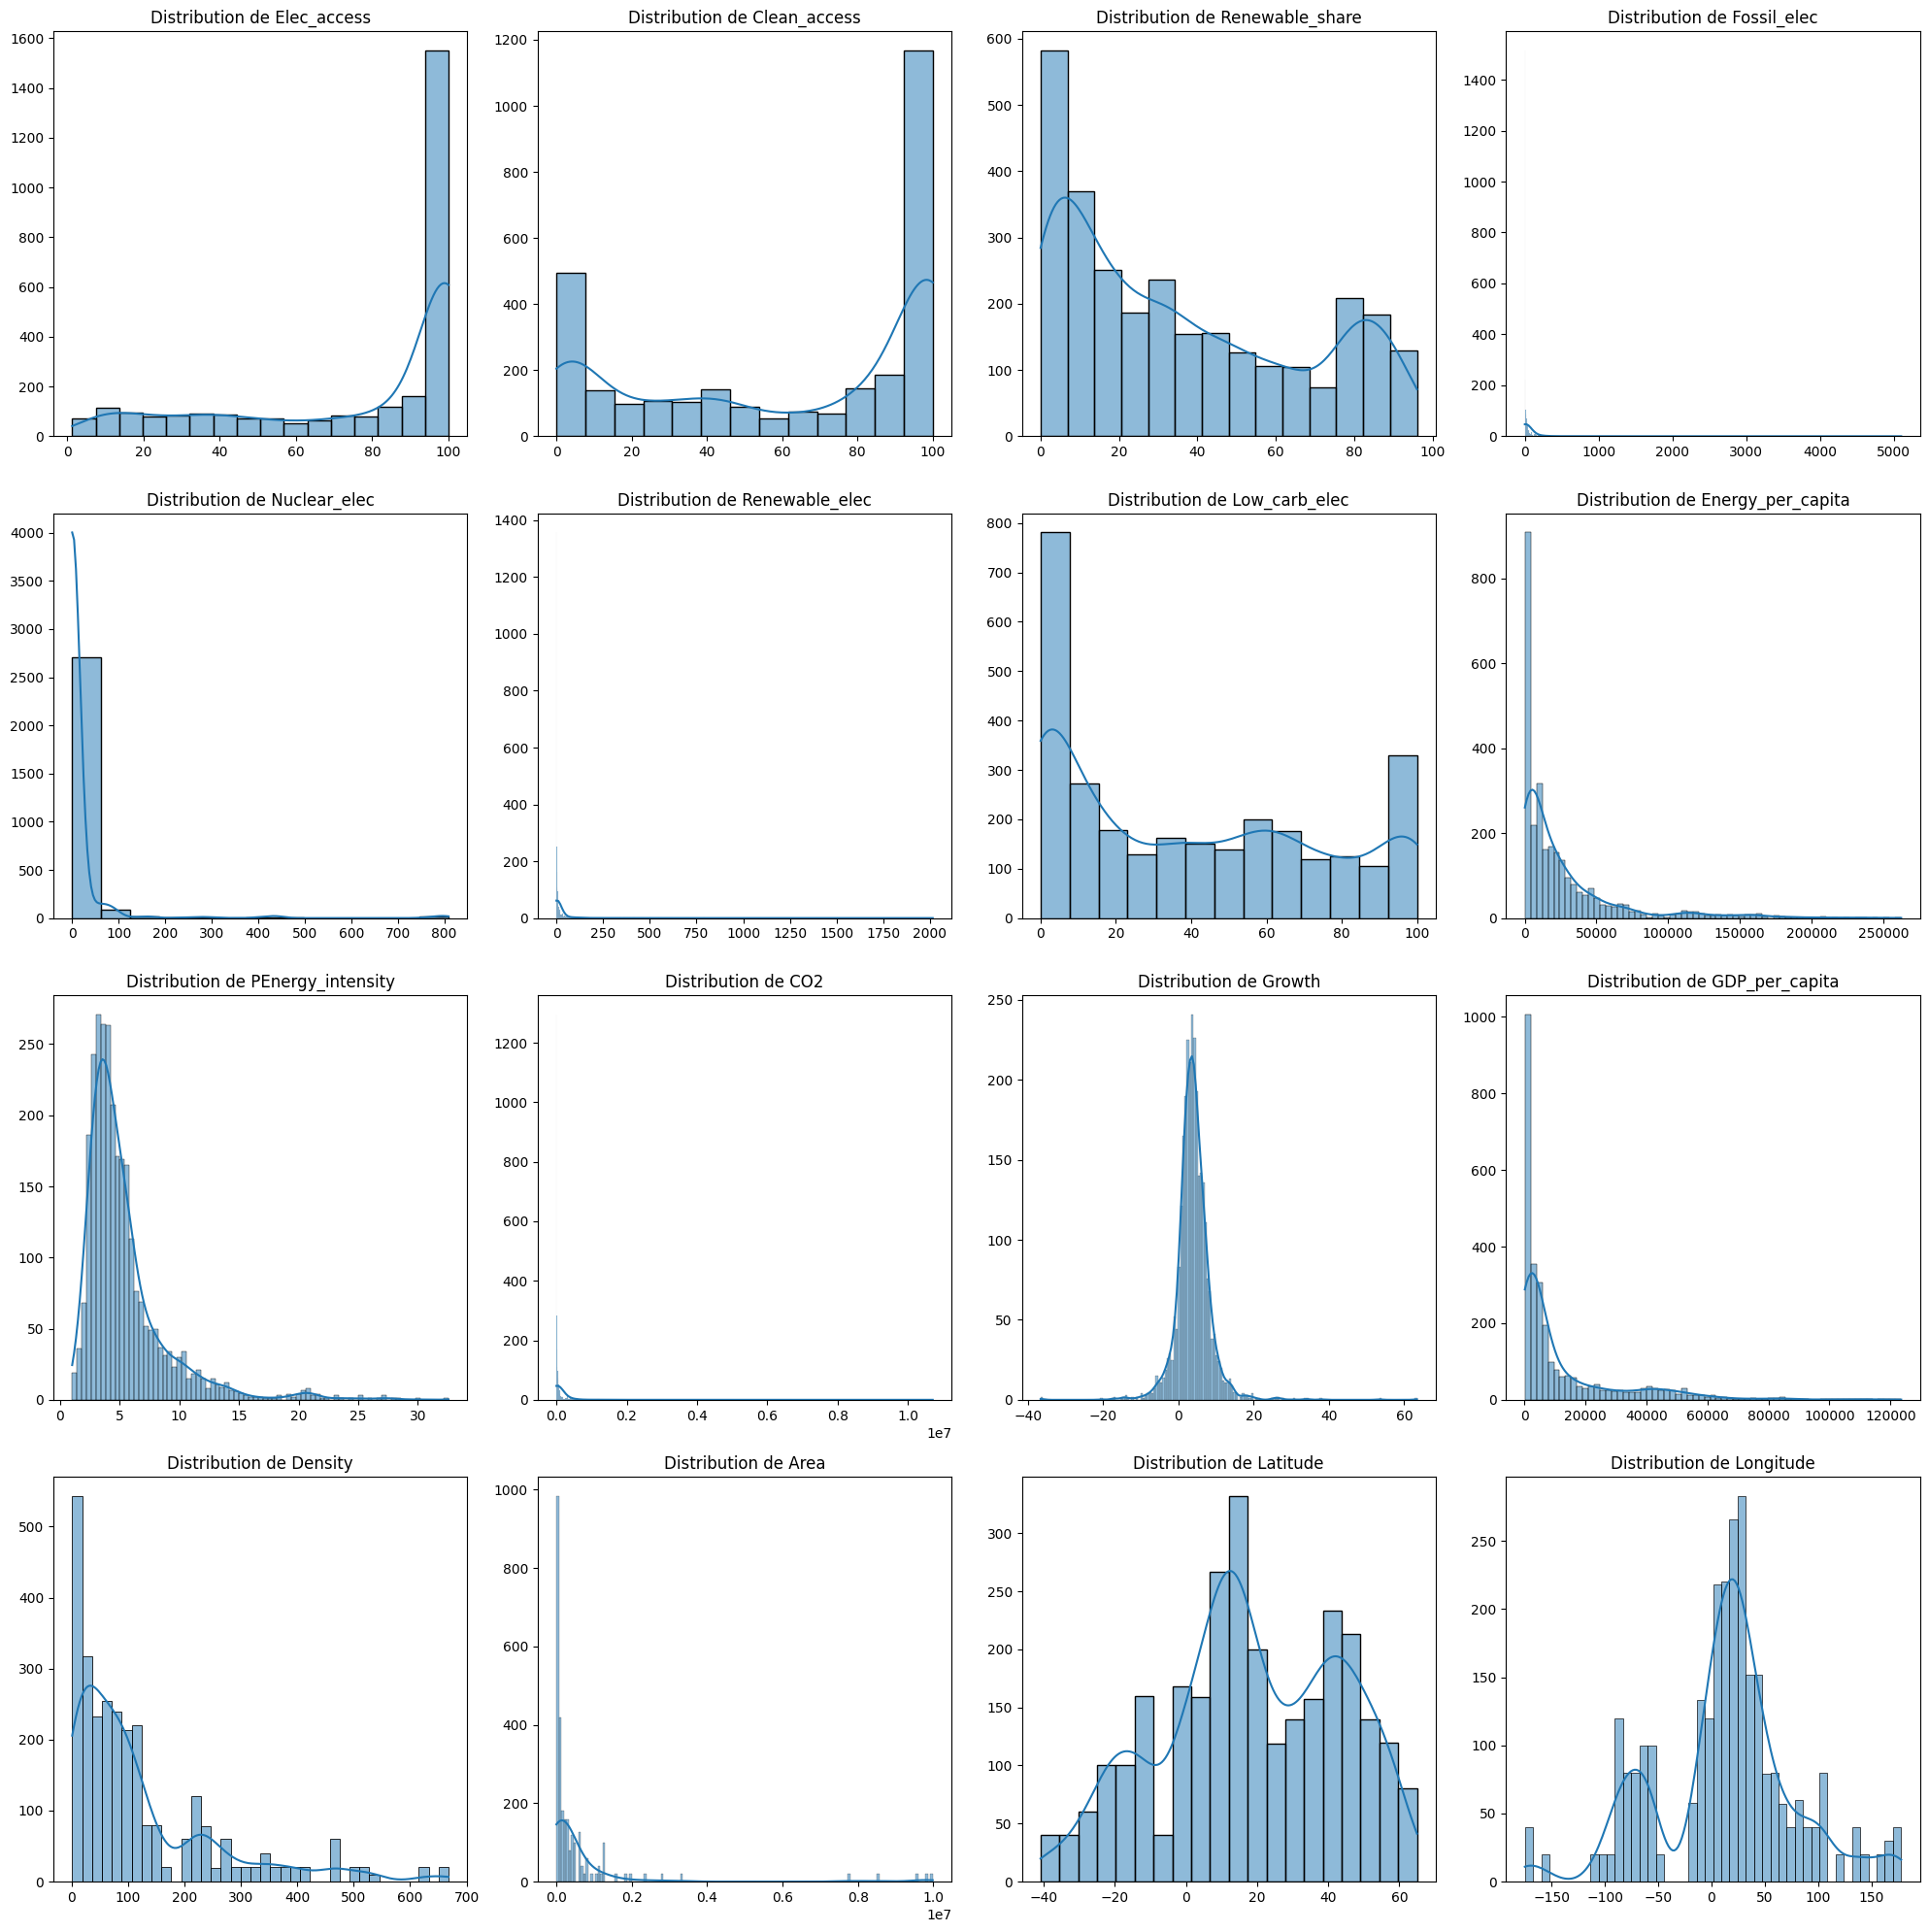

In [12]:
# Définir la taille de la figure pour les subplots
plt.figure(figsize=(20, 20))

# Sélectionner les colonnes numériques pour la visualisation
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns
num_plots = len(numeric_columns)

# Définir le nombre de colonnes et de lignes pour les subplots
n_cols = 4
n_rows = (num_plots + n_cols - 1) // n_cols  # Arrondir à l'entier supérieur pour s'assurer d'avoir assez de lignes

# Créer un subplot pour chaque variable quantitative
for i, column in enumerate(numeric_columns, start=1):
    plt.subplot(n_rows, n_cols, i)
    sns.histplot(data[column], kde=True)
    plt.title(f'Distribution de {column}')
    plt.xlabel('')
    plt.ylabel('')

# Ajuster l'espacement entre les subplots pour une meilleure lisibilité
plt.tight_layout()
plt.show()


Interprétation : 

* Accès à l'électricité et à des combustibles propres : Ces variables montrent une distribution bimodale ou multimodale, indiquant des différences significatives dans l'accès à ces ressources entre différents pays sur différentes années. Des pics vers les valeurs élevées suggèrent que de nombreux pays ont réussi à fournir un accès presque universel, tandis que des creux sont visibles et symbolisent un accès limité.

* Part d'énergie renouvelable dans la consommation d'énergie : On observe que certaines valeurs sont concentrées vers le bas de l'échelle, indiquant des pays où l'énergie renouvelable. Elles constituent une petite partie de la consommation d'énergie. D'autres valeurs étalées vers des pourcentages plus élevés reflètent le fait que certains pays réalisent des efforts pour intégrer les énergies renouvelables.

* Consommation d'énergie primaire par habitant : Cette variable suit une distribution asymétrique avec une longue queue à droite, suggérant que la majorité des pays ont une consommation d'énergie par habitant assez faible, tandis qu'une minorité de pays (probablement des pays plus développés avec de plus grandes industries) ont des valeurs significativement plus élevées. 

* Intensité énergétique et émissions de CO2 : Ces variables montrent des distributions asymétriques, montrant des variations dans l'efficacité énergétique et les différences de niveaux d'émissions entre les pays. Les pays avec une intensité énergétique élevée ou des émissions de CO2 élevées peuvent indiquer une dépendance plus importante aux combustibles fossiles ou une efficacité énergétique moindre.

* Croissance du PIB et PIB par habitant : Ces distributions peuvent fournir des informations sur le développement économique et la répartition de la richesse entre les pays. Des asymétries dans ces distributions pourraient signifier que certains pays profitent d'une croissance économique significative et de niveaux de vie élevés, alors que d'autres restent dans des conditions de faible croissance.

Ces observations peuvent nous aider à identifier des tendances, des anomalies, ou des domaines nécessitant une étude plus approfondie. La manière dont ces variables se distribuent peut également suggérer des stratégies pour gérer les valeurs manquantes, transformer les données, ou choisir des modèles de machine learning adaptés à la nature de nos données.

Cepandant, certains graphiques ne sont pas très visibles avec cet affichage sous forme de subplots, nous allons zoomer sur certains histogrammes

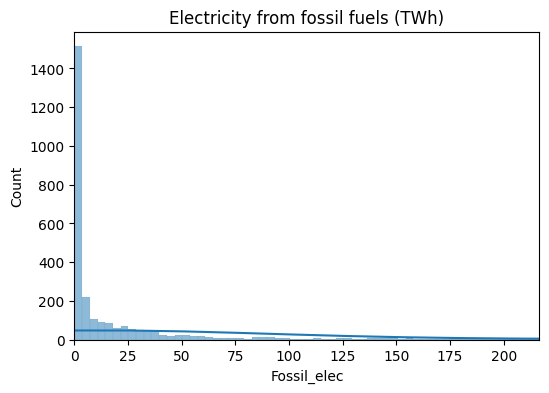

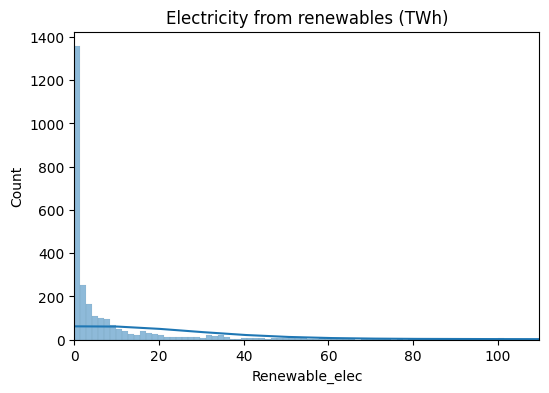

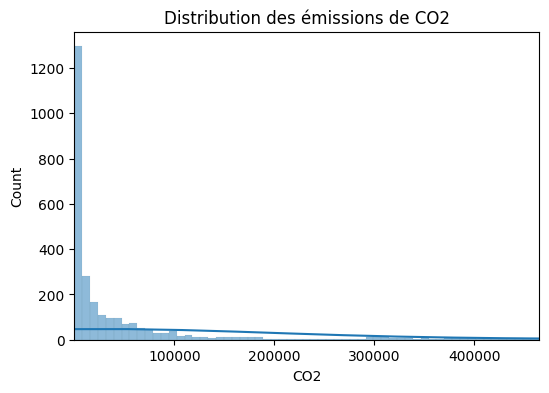

In [13]:
# Réglage de la taille de la figure pour chaque graphique
fig_size = (6, 4)

# Graphique pour 'Fossil_elec'
plt.figure(figsize=fig_size)
sns.histplot(data['Fossil_elec'], kde=True)
plt.title('Electricity from fossil fuels (TWh)')
plt.xlim(data['Fossil_elec'].min(), data['Fossil_elec'].quantile(0.95))
plt.show()

# Graphique pour 'Renewable_elec'
plt.figure(figsize=fig_size)
sns.histplot(data['Renewable_elec'], kde=True)
plt.title('Electricity from renewables (TWh)')
plt.xlim(data['Renewable_elec'].min(), data['Renewable_elec'].quantile(0.95))
plt.show()

# Graphique pour 'CO2'
plt.figure(figsize=fig_size)
sns.histplot(data['CO2'], kde=True)
plt.title('Distribution des émissions de CO2')
plt.xlim(data['CO2'].min(), data['CO2'].quantile(0.95))
plt.show()


Interprétation : 

* Électricité provenant des combustibles fossiles (TWh) : Ce graphique montre la distribution des valeurs de production d'électricité à partir de combustibles fossiles à travers différents pays ou années. Cette distribution se concentrant sur la majorité des données, on observe que la production est généralement faible pour la plupart des observations, avec quelques exceptions plus élevées.

* Électricité provenant des énergies renouvelables (TWh) : Cette distribution met en évidence la variabilité de la production d'électricité à partir de sources renouvelables. Comme pour l'électricité fossile, la plupart des valeurs sont relativement basses, reflétant probablement les efforts de transition énergétique en cours dans de nombreux pays.

* Emissions de CO2 : On observe que la plupart des pays ont des niveaux d'émissions relativement bas, avec une longue tendance plate à droite indiquant que quelques pays émettent des quantités significativement plus élevées de CO2. Cette distribution est asymétrique. 

### Transformation des variables

Avec les observations réalisées dans la partie précédente, nous pouvons nous demander s'il serait judicieux de transformer nos données. Nous pouvons nous demader ce que nous pourrions modifier sur celles-ci et ce que ces modifications pourraient apporter. 

* Réduction de l'asymétrie : Certaines de nos variables montrent une distribution asymétrique avec une queue à droite, ce qui indique une asymétrie positive. Une transformation logarithmique pourrait aider à réduire cette asymétrie, rendant la distribution plus proche d'une distribution normale. Cela est souvent une exigence ou une attente pour de nombreux modèles de régression et d'autres analyses statistiques.

* Gestion des valeurs extrêmes : Les valeurs extrêmes observées dans ces variables peuvent influencer de manière très importante les analyses statistiques et les modèles de prédiction. Les transformations peuvent réduire l'impact de ces valeurs extrêmes en les rapprochant du reste des données, améliorant ainsi la robustesse des modèles.

* Stabilisation de la variance : La variance des données peut augmenter avec l'augmentation des valeurs de la variable. Une transformation logarithmique peut aider à stabiliser la variance sur l'ensemble des données.

En résumé, pour notre projet, envisager des transformations pour ces variables quantitatives peut non seulement améliorer la qualité de nos analyses statistiques et de modélisation mais aussi aider à dériver des insights plus précis et fiables à partir de nos données. En particulier, une transformation logarithmique pourrait être une bonne piste d'amélioration.

Nous allons appliquer cette transformation logarithmique sur les colonnes suivantes : 'Fossil_elec', 'Renewable_elec', 'Energy_per_capita' et 'CO2'.

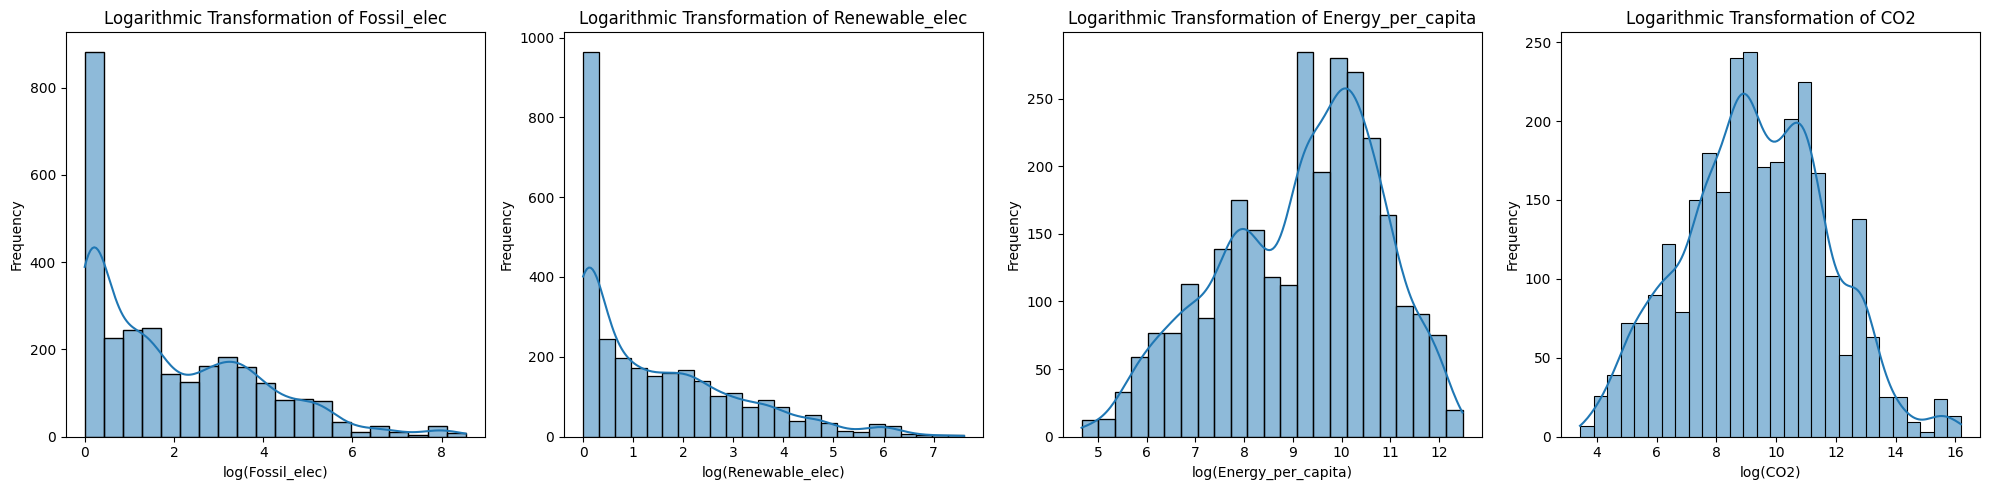

In [14]:
# Liste des colonnes à transformer
columns_to_transform = [
    'Fossil_elec', 
    'Renewable_elec', 
    'Energy_per_capita', 
    'CO2'
]

# Appliquer la transformation logarithmique avec ajustement pour les valeurs nulles
for col in columns_to_transform:
    data[f'log_{col}'] = np.log(data[col] + 1)  # +1 pour gérer les valeurs de 0

# Visualiser les distributions après transformation
plt.figure(figsize=(20, 5))

for i, col in enumerate(columns_to_transform, 1):
    plt.subplot(1, 4, i)
    sns.histplot(data[f'log_{col}'], kde=True)
    plt.title(f'Logarithmic Transformation of {col}')
    plt.xlabel(f'log({col})')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


Interprétation : Après les transformations logarithmiques on remarque que

* La distribution de l'électricité provenant des combustibles fossiles, de l'électricité provenant des énergies renouvelables (TWh), de la consommation d'énergie primaire par habitant, et des émissions de CO2 est devenue plus symétrique et ressemble davantage à une distribution normale. On observe un résultat cohérent avec nos attentes.

* La transformation logarithmique a aidé à réduire l'effet des valeurs extrêmes, rendant les distributions moins asymétriques et facilitant potentiellement l'application de techniques statistiques et de modélisation qui supposent la normalité des données.

* Ces transformations peuvent améliorer la performance des modèles en rendant les relations entre les variables plus linéaires et en stabilisant la variance des erreurs.

### Etude des émissions de CO2

C:\Users\Manon Julia\AppData\Local\Temp\ipykernel_4472\2175035840.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  co2_emissions_by_country = data.groupby('Entity')['CO2'].sum().sort_values(ascending=False)


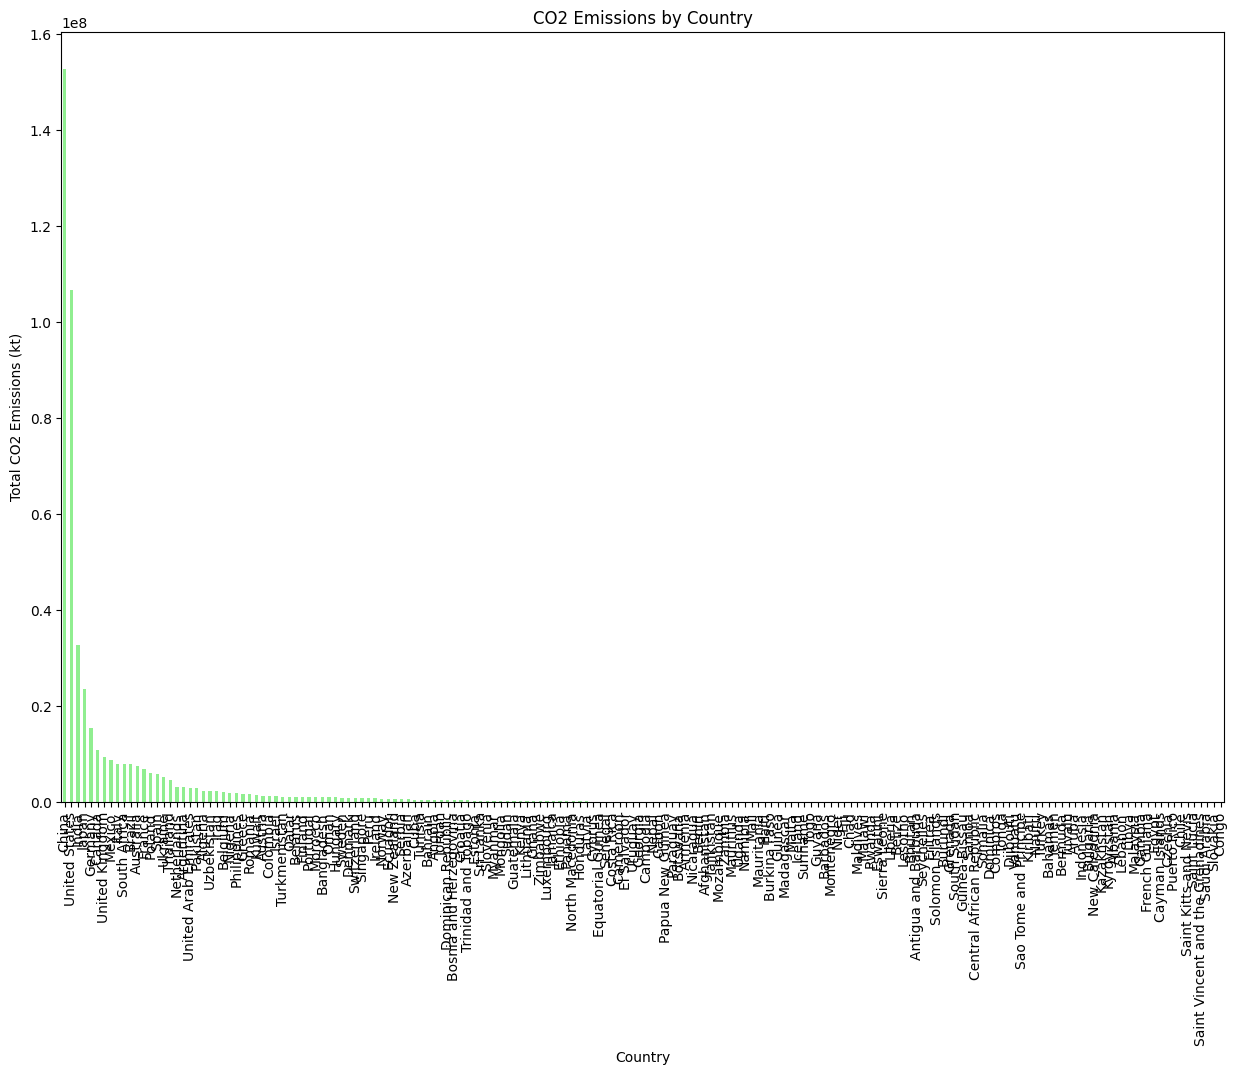

In [15]:
# Visualisation de l'hétérogénéité des émissions de CO2 pour tous les pays

plt.figure(figsize=(15, 10))

co2_emissions_by_country = data.groupby('Entity')['CO2'].sum().sort_values(ascending=False)

co2_emissions_by_country.plot(kind='bar', color='lightgreen')
plt.title('CO2 Emissions by Country')
plt.xlabel('Country')
plt.ylabel('Total CO2 Emissions (kt)')
plt.xticks(rotation=90)
plt.show()


Le graphique illustre clairement l'hétérogénéité des émissions de CO2 parmi les pays de notre jeu de données. On note une concentration très élevée des émissions parmi les premiers pays et une diminution significative à mesure que l'on avance vers les pays moins émetteurs. Cette distribution montre que quelques pays sont responsables d'une part disproportionnée des émissions globales de CO2, tandis que de nombreux autres pays contribuent relativement peu à ce total.

In [16]:
# Calcul du ratio entre le pays le plus émetteur et le pays le moins émetteur
# Exclure les pays avec des émissions de CO2 égales à 0 avant de calculer le ratio
co2_emissions = co2_emissions_by_country[co2_emissions_by_country > 0]
max_emissions = co2_emissions.max()
min_emissions = co2_emissions.min()
emissions_ratio = max_emissions / min_emissions

emissions_ratio

print("Ratio entre le pays le plus émetteur et le pays le moins émetteur :", emissions_ratio)


Ratio entre le pays le plus émetteur et le pays le moins émetteur : 288175.1906836442


Interprétation : 

Le ratio des émissions totales de CO2 entre le pays le plus émetteur (Chine) et le pays le moins émetteur (Kyrgyzstan) est d'environ 288 175, mettant en évidence une différence extrême dans les contributions aux émissions globales de CO2. Cela souligne la concentration très élevée des émissions parmi un petit nombre de pays.

In [28]:
# Initialiser la somme cumulée des émissions et le compteur de pays
cumulative_emissions = 0
countries_count = 0

# Trier les émissions par ordre croissant
sorted_emissions = co2_emissions_by_country[co2_emissions_by_country > 0].sort_values()
total_co2_emissions = co2_emissions_by_country[co2_emissions_by_country > 0].sum()

# Itérer sur les émissions de CO2 des pays pour calculer la somme cumulée
for emissions in sorted_emissions:
    cumulative_emissions += emissions
    countries_count += 1
    if cumulative_emissions / total_co2_emissions > 0.1:
        countries_count -= 1  # Ajuster pour ne pas compter le pays qui dépasse le seuil
        break


nbr_country = data['Entity'].nunique()

print("Nommbre total de pays :", nbr_country)
print("")
print("En classant les pays du moins émetteur au plus émetteur : ")
print("Nombre de pays dont la somme des émissions représente moins de 10% des émissions totales : ", countries_count)


Nommbre total de pays : 148

En classant les pays du moins émetteur au plus émetteur : 
Nombre de pays dont la somme des émissions représente moins de 10% des émissions totales :  125


Interprétation :

On classe les 148 pays du moins émetteur en CO2 au plus émetteur. Si on somme les émissions des 125 pays les moins émetteurs de CO2, ces émissions ne dépassent pas 10% de la valeur totale à l'échelle mondiale. On en dduite que 90% des émissions en CO2 proviennent des 23 pays les plus émetteurs d'émissions à l'échelle mondiale.

Nous allons maintenant étudier les 5 pays les plus émetteurs.

C:\Users\Manon Julia\AppData\Local\Temp\ipykernel_4472\1419189449.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  co2_emissions_by_country = data.groupby('Entity')['CO2'].sum().sort_values(ascending=False)


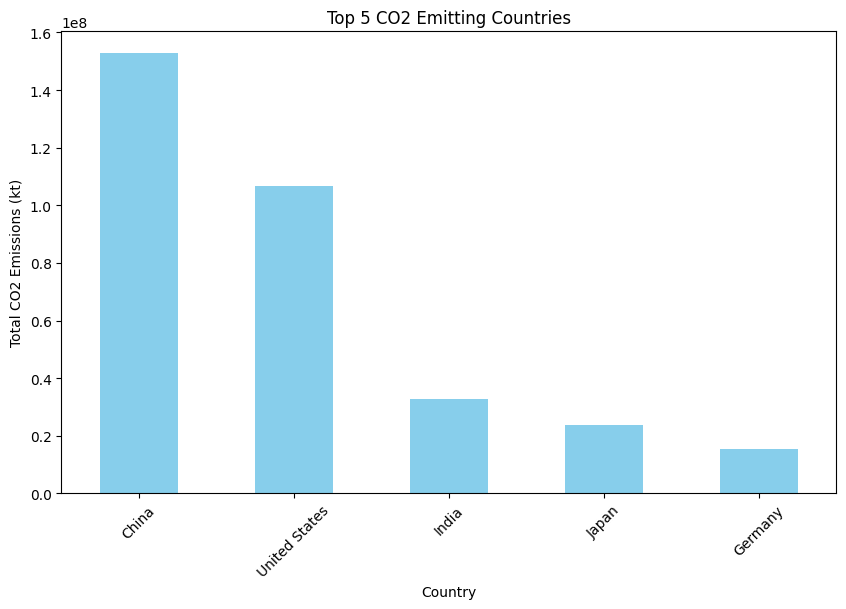

Entity
China            1.527328e+08
United States    1.065908e+08
India            3.267958e+07
Japan            2.367469e+07
Germany          1.547289e+07
Name: CO2, dtype: float64

In [18]:
# Grouper les données par pays et calculer la somme totale des émissions de CO2 pour chaque pays
co2_emissions_by_country = data.groupby('Entity')['CO2'].sum().sort_values(ascending=False)

# Sélectionner les 5 pays les plus émetteurs de CO2
top_5_co2_emitters = co2_emissions_by_country.head(5)

# Visualisation des 5 plus grands émetteurs de CO2
plt.figure(figsize=(10, 6))
top_5_co2_emitters.plot(kind='bar', color='skyblue')
plt.title('Top 5 CO2 Emitting Countries')
plt.xlabel('Country')
plt.ylabel('Total CO2 Emissions (kt)')
plt.xticks(rotation=45)
plt.show()

# Afficher les noms et les valeurs des 5 plus grands émetteurs de CO2
top_5_co2_emitters


In [30]:
# Calculer la somme des émissions des 5 pays les plus émetteurs
sum_top_5_co2_emitters = top_5_co2_emitters.sum()
print("Sommme des émissions des 5 pays les plus émetteurs :",sum_top_5_co2_emitters)
print("")

# Calculer le pourcentage que représente la somme des émissions des 5 pays les plus émetteurs par rapport aux émissions totales
percentage_top_5_co2_emitters = (sum_top_5_co2_emitters / co2_emissions_by_country.sum()) * 100
print("Pourcentage des émissions des 5 pays les plus polluants :", percentage_top_5_co2_emitters)


Sommme des émissions des 5 pays les plus émetteurs : 331150779.70289993

Pourcentage des émissions des 5 pays les plus polluants : 68.39546759559938


La visualisation montre clairement l'hétérogénéité des émissions de CO2 entre les pays, avec les 5 pays les plus émetteurs de CO2 étant :

* Chine avec environ 152 732 800 kt de CO2 émis.
* États-Unis avec environ 106 590 800 kt de CO2 émis.
* Inde avec environ 32 679 580 kt de CO2 émis.
* Japon avec environ 23 674 690 kt de CO2 émis.
* Allemagne avec environ 15 472 890 kt de CO2 émis.

Ces résultats mettent en évidence la grande disparité des contributions aux émissions de CO2 à l'échelle mondiale, avec la Chine et les États-Unis se distinguant nettement comme les plus grands émetteurs. Au total, les émissions des 5 pays les plus polluants représentent 331 150 779 kt de CO2 émis, c'est à dire 68% des émissions totales.

## Analyse descriptive multidimensionnelle des données

### Visualisation avec des Scatter Plots


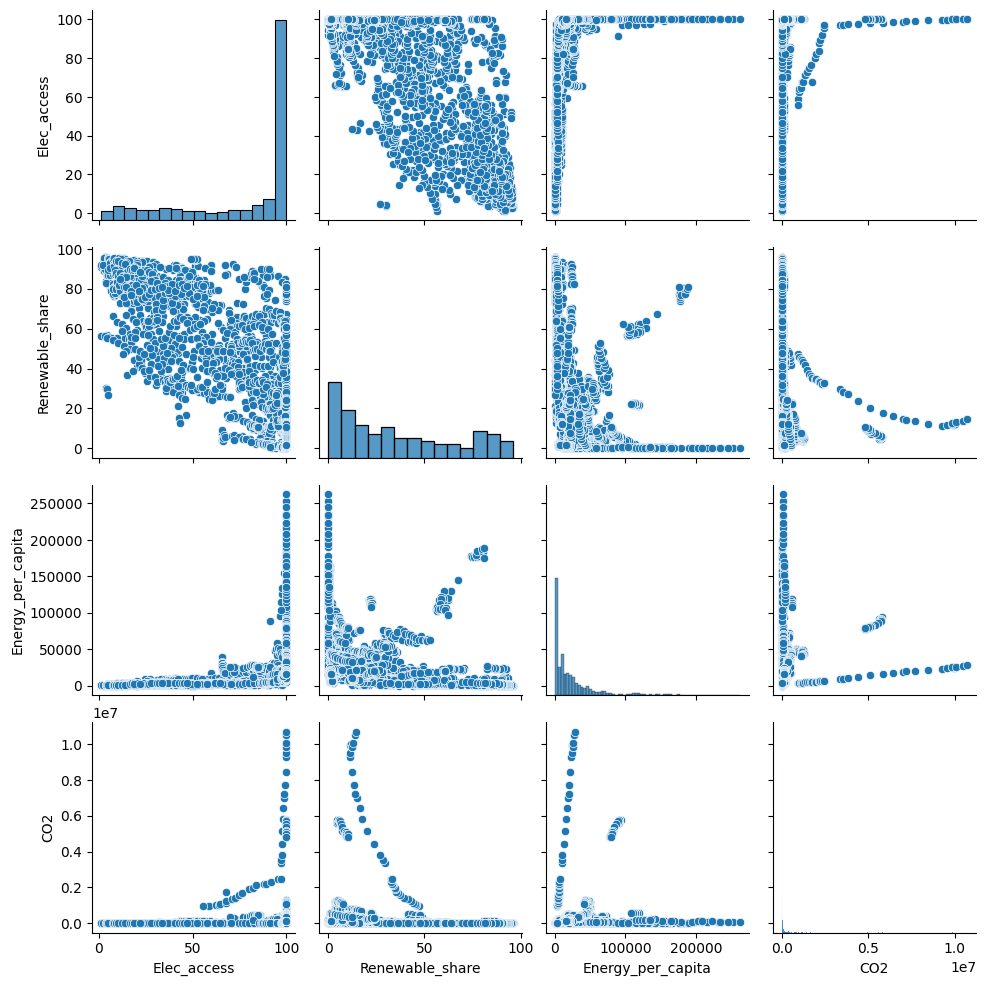

In [31]:
# Sélectionner quelques variables clés pour l'analyse
variables_to_analyze = [
    'Elec_access',
    'Renewable_share',
    'Energy_per_capita',
    'CO2'
]

# Créer des scatter plots pour chaque paire de variables
sns.pairplot(data[variables_to_analyze])
plt.show()


Interprétation : 

Les scatter plots ci-dessus montrent les relations entre quatre variables clés de notre jeu de données : l'accès à l'électricité, la part de l'énergie renouvelable dans la consommation finale d'énergie, la consommation d'énergie primaire par habitant et les émissions totales de CO2 par pays.

* Accès à l'électricité vs. Autres Variables : Il semble y avoir une augmentation des émissions de CO2 et de la consommation d'énergie primaire par habitant à mesure que l'accès à l'électricité augmente. Cela peut indiquer que les pays plus développés, avec un meilleur accès à l'électricité, ont tendance à consommer plus d'énergie et à émettre plus de CO2.

* Part de l'énergie renouvelable vs. Émissions de CO2 : Il n'y a pas de relation clairement visible dans le scatter plot. Cela suggère que la part des énergies renouvelables dans la consommation finale d'énergie ne semble pas être directement corrélée aux émissions totales de CO2 par pays. Ceci pourrait indiquer que d'autres facteurs, tels que l'efficacité énergétique, la mixité des sources d'énergie et la taille de l'économie, jouent un rôle important. Nous pouvons vérifier cette hypothèse en étudiant ces corrélations. 

* Consommation d'énergie primaire par habitant vs. Émissions de CO2 : Comme attendu, il semble exister une relation positive entre la consommation d'énergie primaire par habitant et les émissions totales de CO2. Cela reflète le fait que les pays avec une consommation d'énergie par habitant plus élevée tendent à avoir des émissions de CO2 plus importantes, probablement en raison d'une activité économique plus présente et d'une plus grande utilisation des combustibles fossiles.

### Corrélations entre les variables

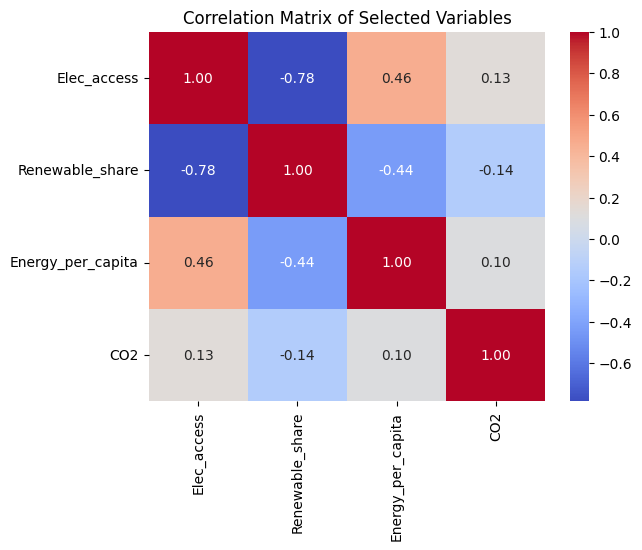

In [32]:
# Calculer le coefficient de corrélation de Pearson entre les variables sélectionnées
correlation_matrix = data[variables_to_analyze].corr()

# Afficher la matrice de corrélation
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Selected Variables")
plt.show()


Interprétation : 

La matrice de corrélation ci-dessus montre les coefficients de corrélation entre les variables.

* Accès à l'électricité : Cette variable ne montre pas de corrélation forte avec les émissions de CO2 ou la part de l'énergie renouvelable, ce qui suggère que l'accès universel à l'électricité peut être atteint indépendamment des niveaux d'émissions de CO2 ou de la part des énergies renouvelables, et ce qui paraît cohérent.

* Part de l'énergie renouvelable : La corrélation entre la part de l'énergie renouvelable dans la consommation finale d'énergie et les émissions de CO2 est faible, indiquant que l'augmentation de la part des énergies renouvelables n'est pas directement liée à une réduction des émissions de CO2 au niveau des données analysées. Cela pourrait refléter le fait que d'autres facteurs, tels que l'efficacité énergétique et le mix énergétique global, affectent également les émissions.

* Consommation d'énergie primaire par habitant : Il existe une corrélation positive modérée avec les émissions de CO2, ce qui est cohérent avec l'idée que des niveaux de consommation d'énergie plus élevés sont associés à des émissions plus importantes. Cette relation souligne l'importance de l'efficacité énergétique et de la transition vers des sources d'énergie moins carbonées pour réduire les émissions.

Ces résultats montrent les relations entre l'accès à l'électricité, la part des énergies renouvelables, la consommation d'énergie et les émissions de CO2. Ils suggèrent que, bien que l'augmentation de la part des énergies renouvelables soit importante pour un avenir durable, des efforts supplémentaires en matière d'efficacité énergétique et de réduction de la consommation d'énergie sont nécessaires pour atteindre une réduction significative des émissions de CO2. 

Nous allons vérifier cette hypothèse en étudiant les corrélations entre d'autres variables.